In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.shape

(13320, 9)

In [5]:
def getInfo(df):
    #getting basic summary of the dataset by displaying column,no. of null val, % of null val
    
    # .T - to transpose the dataframe
    df_info = pd.DataFrame(df.dtypes).T.rename(index={0:'dtype'})
    df_info = pd.concat([df_info,pd.DataFrame(df.isnull().sum()).T.rename(index={0:'no. of null values'})])
    df_info = pd.concat([df_info,pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'% of null values'})])
    
    return display(df_info)
getInfo(df)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
dtype,object,object,object,object,object,object,float64,float64,float64
no. of null values,0,0,1,16,5502,0,73,609,0
% of null values,0.0,0.0,0.007508,0.12012,41.306306,0.0,0.548048,4.572072,0.0


In [6]:
for col in df.columns:
    print(df[col].value_counts())
    print('\n'+'-'*50+'\n')

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

--------------------------------------------------

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

--------------------------------------------------

location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

-----------------------------------------------

In [7]:
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [8]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [9]:
getInfo(df)

,location,size,total_sqft,bath,price
dtype,object,object,object,float64,float64
no. of null values,1,16,0,73,0
% of null values,0.007508,0.12012,0.0,0.548048,0.0


In [10]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [11]:
df[df['bath']==40]

,location,size,total_sqft,bath,price
4684,Munnekollal,43 Bedroom,2400,40.0,660.0


In [12]:
df[df['price']==3600]

,location,size,total_sqft,bath,price
13067,Defence Colony,10 Bedroom,7150,13.0,3600.0


### Handling missing values

##### Categorical

In [13]:
df['location'].value_counts()

location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

In [14]:
df['location'].fillna('Sarjapur  Road',inplace=True)

C:\Users\Anish\AppData\Local\Temp\ipykernel_2040\353131095.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['location'].fillna('Sarjapur  Road',inplace=True)


In [15]:
df['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [16]:
df['size'].fillna('2 BHK',inplace=True)

C:\Users\Anish\AppData\Local\Temp\ipykernel_2040\4235373563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna('2 BHK',inplace=True)


##### Numerical

In [17]:
df['bath'].fillna(df['bath'].median(),inplace=True)

C:\Users\Anish\AppData\Local\Temp\ipykernel_2040\1355011792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bath'].fillna(df['bath'].median(),inplace=True)


In [18]:
getInfo(df)

,location,size,total_sqft,bath,price
dtype,object,object,object,float64,float64
no. of null values,0,0,0,0,0
% of null values,0.0,0.0,0.0,0.0,0.0


### Feature Engineering

#### COL -size

In [19]:
df['size'].value_counts()

size
2 BHK         5215
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [20]:
df['bhk'] = df['size'].str.split().str.get(0).astype(int)

In [21]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


<Axes: xlabel='bhk'>

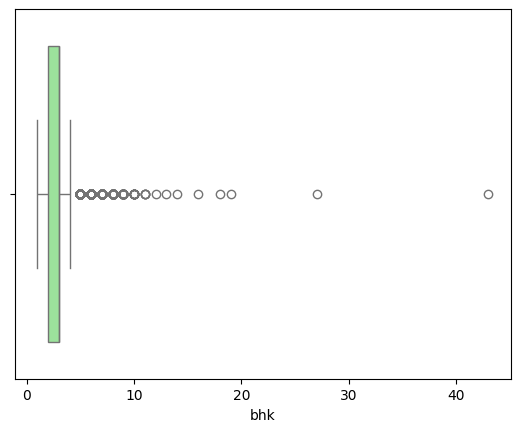

In [22]:
sns.boxplot(x=df['bhk'],color='lightgreen')

##### COL - total sqft

In [23]:
diff_row = []
for v in df['total_sqft'].unique():
    try :
        tm = float(v)
    except:
        diff_row.append(v)
diff_row

['2100 - 2850',
 '3010 - 3410',
 '2957 - 3450',
 '3067 - 8156',
 '1042 - 1105',
 '1145 - 1340',
 '1015 - 1540',
 '1520 - 1740',
 '34.46Sq. Meter',
 '1195 - 1440',
 '1200 - 2400',
 '4125Perch',
 '1120 - 1145',
 '4400 - 6640',
 '3090 - 5002',
 '4400 - 6800',
 '1160 - 1195',
 '1000Sq. Meter',
 '4000 - 5249',
 '1115 - 1130',
 '1100Sq. Yards',
 '520 - 645',
 '1000 - 1285',
 '3606 - 5091',
 '650 - 665',
 '633 - 666',
 '5.31Acres',
 '30Acres',
 '1445 - 1455',
 '884 - 1116',
 '850 - 1093',
 '1440 - 1884',
 '716Sq. Meter',
 '547.34 - 827.31',
 '580 - 650',
 '3425 - 3435',
 '1804 - 2273',
 '3630 - 3800',
 '660 - 670',
 '1500Sq. Meter',
 '620 - 933',
 '142.61Sq. Meter',
 '2695 - 2940',
 '2000 - 5634',
 '1574Sq. Yards',
 '3450 - 3472',
 '1250 - 1305',
 '670 - 980',
 '1005.03 - 1252.49',
 '1004 - 1204',
 '361.33Sq. Yards',
 '645 - 936',
 '2710 - 3360',
 '2249.81 - 4112.19',
 '3436 - 3643',
 '2830 - 2882',
 '596 - 804',
 '1255 - 1863',
 '1300 - 1405',
 '1500 - 2400',
 '117Sq. Yards',
 '934 - 1437',


In [24]:
df[df['total_sqft'].str.contains('Acres')]

,location,size,total_sqft,bath,price,bhk
1019,Marathi Layout,1 Bedroom,5.31Acres,1.0,110.0,1
1086,Narasapura,2 Bedroom,30Acres,2.0,29.5,2
6333,Harohalli,2 Bedroom,2.09Acres,2.0,200.0,2
7334,Kanakpura Road,1 Bedroom,2Acres,1.0,125.0,1
7607,Bommenahalli,3 Bedroom,15Acres,3.0,217.0,3
7726,Kanakpura Road,1 Bedroom,1.26Acres,1.0,125.0,1
10488,2 Bedroom Furnished Farm House in Kolar Road,2 Bedroom,1.25Acres,2.0,200.0,2
11615,arudi,3 Bedroom,6Acres,2.0,80.0,3


In [25]:
def cvtRng(x):
    temp = x.split('-')
    if len(temp)==2:
        return ((float(temp[0])+float(temp[1]))/2)
    try:
        return float(x)
    except:
        return None
df['total_sqft'] = df['total_sqft'].apply(cvtRng) 

In [26]:
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


#### New col - price_persqft

In [27]:
df['price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [28]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [29]:
df['location'] = df['location'].apply(lambda x: x.strip())

In [30]:
df['location'].value_counts()

location
Whitefield            541
Sarjapur  Road        400
Electronic City       304
Kanakpura Road        273
Thanisandra           237
                     ... 
Hsr layout sector3      1
Thyagraj Nagar          1
Banagirinagar           1
Medaralli               1
Chikkajala              1
Name: count, Length: 1294, dtype: int64

In [31]:
loc_less10 = df['location'].value_counts()[df['location'].value_counts()<=10]
loc_less10

location
Dodsworth Layout         10
Nagadevanahalli          10
Sadashiva Nagar          10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Hsr layout sector3        1
Thyagraj Nagar            1
Banagirinagar             1
Medaralli                 1
Chikkajala                1
Name: count, Length: 1053, dtype: int64

In [32]:
df['location'] = df['location'].apply(lambda x : 'other' if x in loc_less10 else x)

### Outlier detection and removal

In [33]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


From this, min value for total_sqft looks kinda fishy. So lets analyse total_sqft

In [34]:
(df['total_sqft']/df['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [35]:
df = df[((df.total_sqft/df.bhk)>=300)]

In [36]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [37]:
df.shape

(12530, 7)

In [38]:
df['price_per_sqft'].describe()

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [39]:
def rmv_outl_sqft(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        fil_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
        df_out=pd.concat([df_out,fil_df],ignore_index=True)
    return df_out
df=rmv_outl_sqft(df)
df.shape

(10301, 7)

In [40]:
def rmv_outl_bhk(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_sats={}
        for bhk,BHK_df in location_df.groupby('bhk'):
            bhk_sats[bhk]={
                'mean':np.mean(BHK_df.price_per_sqft),
                'std':np.std(BHK_df.price_per_sqft),
                'count':BHK_df.shape[0]
            }
        for bhk,BHK_df in location_df.groupby('bhk'):
            stats=bhk_sats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,BHK_df[BHK_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df=rmv_outl_bhk(df)
df.shape

(7360, 7)

In [41]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [42]:
df.drop(columns=['size','price_per_sqft'],inplace=True)

### MODEL

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [44]:
df.to_csv('Bengaluru_House_Data_Cleaned.csv')

In [45]:
X = df.drop(columns=['price'])
y = df['price']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=40)

#### Liner Regression

In [47]:
col_trans = make_column_transformer((OneHotEncoder(sparse_output=False),['location']),remainder='passthrough')
scaler = StandardScaler()
lr = LinearRegression()

In [48]:
pipe = make_pipeline(col_trans,scaler,lr)
pipe.fit(X_train,y_train)


c:\Users\Anish\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [49]:
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8599857780827979

#### Lasso

In [50]:
lasso = Lasso()
pipe = make_pipeline(col_trans,scaler,lasso)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.843823494156984

#### Ridge

In [51]:
ridge = Ridge()
pipe = make_pipeline(col_trans,scaler,ridge)
pipe.fit(X_train,y_train)
y_pred = pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8599730535717593

In [53]:
import pickle
pickle.dump(pipe,open('RidgeModel.pkl','wb'))